# Esame Laboratorio di Programmazione II - 27/06/2025


## Esercizio 1

Crea un array NumPy con i prezzi (in euro) di 5 libri: **14.99, 22.50, 9.75, 18.00, 31.20, 12.80, 24.90, 8.40, 19.99, 27.30**

1. Calcola il prezzo medio dei libri
2. Seleziona i libri con un prezzo maggiore della media.
3. Crea un nuovo array che applica uno sconto del 10% solo ai libri che costano più della media.

In [7]:
import numpy as np

# Creo l'array con i prezzi forniti nella traccia
prezzi = np.array([14.99, 22.50, 9.75, 18.00, 31.20, 12.80, 24.90, 8.40, 19.99, 27.30])

# 1. CALCOLO IL PREZZO MEDIO usando il metodo .mean() di Numpy
media_prezzi = prezzi.mean()
print(f"Prezzo medio: {media_prezzi:.2f}€")

# 2. SELEZIONO I LIBRI con Prezzo > Media (Indicizzazione Booleana)
libri_sopra_media = prezzi[prezzi > media_prezzi]
print(f"Libri sopra la media: {libri_sopra_media.tolist()}")     # Uso .tolist() per stampare con virgole

# 3. CREO UN NUOVO ARRAY che applica uno sconto del 10% solo ai libri che costano di più della media

# Creo una copia per non modificare l'originale
prezzi_scontati = prezzi.copy()

# Uso l'indicizzazione booleana per identificare le posizioni e applicare lo sconto (solo se la condizione prezzi_scontati > media_prezzi è TRUE)
prezzi_scontati[prezzi_scontati > media_prezzi] *= 0.9

# Stampo i nuovi prezzi (utilizzo np.round per visualizzare solo 2 decimali e converto in lista per avere le virgole nel print)
print(f"Nuovi prezzi (scontati solo i sopra media): {np.round(prezzi_scontati, 2). tolist()}")


Prezzo medio: 18.98€
Libri sopra la media: [22.5, 31.2, 24.9, 19.99, 27.3]
Nuovi prezzi (scontati solo i sopra media): [14.99, 20.25, 9.75, 18.0, 28.08, 12.8, 22.41, 8.4, 17.99, 24.57]


## Esercizio 2

Simula 1000 lanci di una moneta che ad ogni lancio ha il doppio di probabilità di risultare croce invece che testa. Ogni lancio è rappresentato da 1 (testa) o 0 (croce).

1. Crea un array NumPy contenente i risultati.
2. Calcola la proporzione di teste dopo ogni 50 lanci cumulativi.
3. Crea un grafico della proporzione cumulativa nel tempo (dopo 50 lanci, dopo 100, dopo 150,...).

Primi 20 risultati: [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0]
Ultime 5 proporzioni cumulative: [0.352, 0.352, 0.342, 0.335, 0.335]


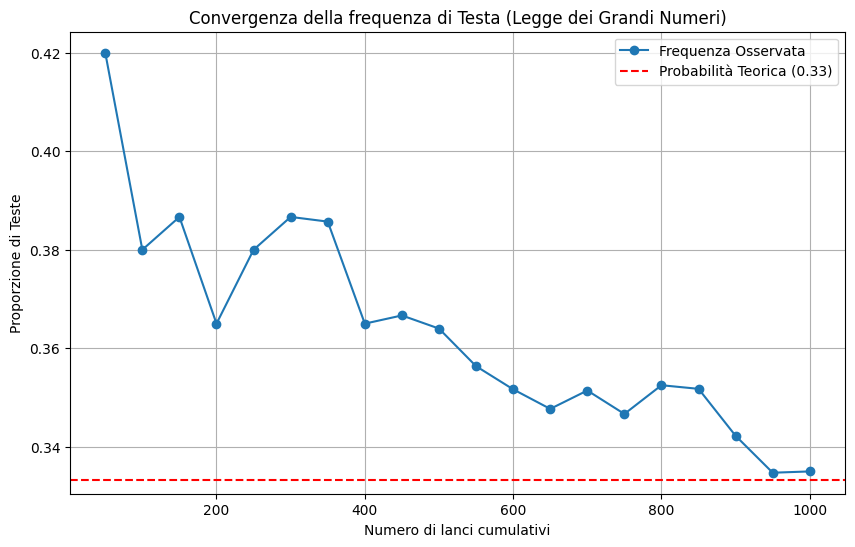

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# 1. CONFIGURAZIONE DELLE PROBABILITA'

# Calcolo teorico: P(Testa) = 1/3, P(Croce) = 2/3
prob_testa = 1/3
prob_croce = 2/3
n_lanci = 1000

# Generazione dei lanci (1 = Testa, 0 = Croce)
lanci = np.random.choice([1, 0], size=n_lanci, p=[prob_testa, prob_croce])

# Stampo i primi 20 lanci convertendo in lista per avere le virgole
print(f"Primi 20 risultati: {lanci[:20].tolist()}")

# 2. CALCOLO PROPORZIONE DI TESTE dopo ogni 50 lanci cumulativi

# Definisco gli step: 50, 100, 150... fino a 1000 usando range()
step_lanci = list(range(50, n_lanci + 1, 50))
proporzioni = []

# Ciclo attraverso gli step definiti
for n in step_lanci:
    # Seleziono i lanci all'inizio fino all'n-esimo (Slicing cumulativo)
    sottogruppo = lanci[:n]

    # Calcolo la media del sottogruppo
    media_corrente = sottogruppo.mean()
    proporzioni.append(media_corrente)

# Stampo le ultime 5 proporzioni calcolate, arrotondate
print(f"Ultime 5 proporzioni cumulative: {np.round(proporzioni[-5:], 3).tolist()}")

# 3. GRAFICO della proposizione cumulativa nel tempo
plt.figure(figsize=(10, 6))

# Plot dell'andamento osservato (la linea che osscilla e poi si stabilizza)
plt.plot(step_lanci, proporzioni, marker='o', label= 'Frequenza Osservata')

# Aggiungo la linea orizzontale della probabilità teorica (1/3 = 0.33)
plt.axhline(y=prob_testa, color='red', linestyle= '--', label='Probabilità Teorica (0.33)')

# Aggiungo titoli ed etichette agli assi
plt.title('Convergenza della frequenza di Testa (Legge dei Grandi Numeri)')
plt.xlabel('Numero di lanci cumulativi')
plt.ylabel('Proporzione di Teste')
plt.legend()
plt.grid(True)

# Mostro il grafico
plt.show()


## Esercizio 3

Crea una funzione di nome **mat_normalizzata** che prende come input una matrice e ritorna la matrice normalizzata.

La funzione deve quindi:
1. Calcolare la media e la deviazione standard della matrice.
2. Normalizzare la matrice sottraendo la media e dividendo per la deviazione standard.

Testa La funzione con un array NumPy 6x10 con numeri campionati da una distribuzione normale (media=5, std=2).

In [16]:
import numpy as np

# Definisco la funzione richiesta che prende in input una matrice
def mat_normalizzata(matrice):
    # 1. CALCOLO MEDIA e DEVIAZIONE STANDARD dell'intera matrice
    media = np.mean(matrice)
    dev_std = np.std(matrice)

    # 2. NORMALIZZO la matrice (formula: Z = (X - mu) / sigma)
    matrice_norm = (matrice - media) / dev_std

    return matrice_norm

# --- TEST DELLA FUNZIONE ---

# Imposto un seed per avere risultati riproducibili
np.random.seed(42)

# Genero un array Numpy 6x10 campionato da una distribuzione normale
dati_input = np.random.normal(loc=5, scale=2, size=(6, 10))

# Applico la funzione creata
dati_output = mat_normalizzata(dati_input)

# --- VERIFICA DI RISULTATI ---
# Se la normalizzazione ha funzionato, la nuova media deve essere circa 0 e la dev.std circa 1

print("--- DATI ORIGINALI ---")
print(f"Media (target 5): {np.mean(dati_input):.2f}")
print(f"Dev. Std (target 2): {np.std(dati_input):.2f}")

print("\n--- DATI NORMALIZZATI ---")
print(f"Media (target 0): {np.mean(dati_output):.2f}")     # Sarà un numero piccolissimo, tipo 0.000...
print(f"Dev. Std (target 1): {np.std(dati_output):.2f}")



--- DATI ORIGINALI ---
Media (target 5): 4.69
Dev. Std (target 2): 1.80

--- DATI NORMALIZZATI ---
Media (target 0): -0.00
Dev. Std (target 1): 1.00


## Esercizio 4

Utilizza il dataset `books.csv`.

1. **Crea una nuova colonna** chiamata `engagement_score`, definita come:

   $$
   \texttt{engagement\_score} = \texttt{average\_rating} \times \log_{10}(1 + \texttt{ratings\_count})
   $$

   *(Un indicatore che tiene conto sia della qualità (valutazione media), sia della quantità di voti. Il logaritmo serve ad attenuare l'effetto dei libri estremamente popolari.)*

2. Trova il **libro con il valore massimo** di `engagement_score`.

3. **Filtra i libri** con una valutazione media (`average_rating`) **maggiore di 4.5**.

4. **Crea un grafico a barre** con i 10 libri con il valore più alto di `engagement_score`.

5. **Crea un grafico a linee** della `average_rating`, ordinando i libri per `ratings_count` crescente.


## Esercizio 5
Utilizza il dataset `adult.csv`.
Contiene informazioni demografiche su adulti negli Stati Uniti. Le colonne rilevanti sono:
- `age`: età (integer)
- `workclass`, `education`, `marital-status`, `occupation`, `race`, `sex`
- `hours-per-week`: ore lavorate a settimana
- `income`: `>50K` o `<=50K` (target)

1. Quante **righe e colonne** ha il dataset?
2. Quanti **valori mancanti** ci sono per colonna?
3. **Sostituisci i valori mancanti** nelle colonne categoriche (workclass, occupation, native-country) con il valore più frequente (la moda).
4. Calcola l’**età media** (`age`) per sesso (`sex`)
5. Trova la % di persone che guadagnano **>50K** per sesso.
7. Crea una **colonna `age_group`** raggruppando le età in fasce: `'<30'`, `'30-50'`, `'>50'`.
8. **Crea**:
   - un grafico **a barre** con % di reddito `>50K` per fascia di età.
   - un **boxplot** delle ore lavorate (`hours-per-week`) per gruppo reddito (<=50, >50).


## Esercizio 6

Genera due array:

`x = np.linspace(0, 5, 80)`  
`y = 2.5 * x + 1.2 + np.random.normal(0, 0.5, 80)`

1. Usa `scipy.optimize.curve_fit` per stimare i parametri della retta.
2. Plotta i punti originali e la retta ottenuta.
3. Calcola MAE e RMSE tra i valori reali e quelli stimati.